In [1]:
import warnings #to ignore all the warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier as ada
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics

df = pd.read_csv("D:\diabetic_data.csv", na_values = '?')# importing the dataset and convert all ? to Nan
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [3]:
df.isnull().sum()*100/len(df)# calculating the percentage of null values

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

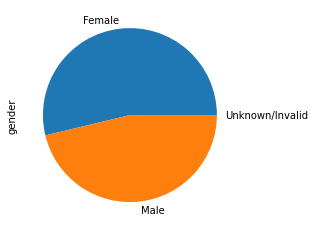

In [4]:
df['gender'].value_counts().plot(kind='pie');# here we can see female are more

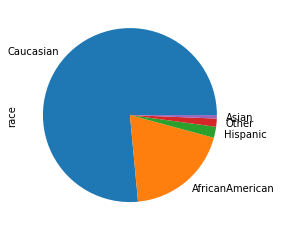

In [5]:
df['race'].value_counts().plot(kind='pie');
# Caucasian race is dominant which is approx 75%

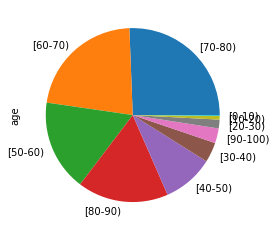

In [6]:
df['age'].value_counts().plot(kind='pie');# we can see age group of 60-80 are a majority

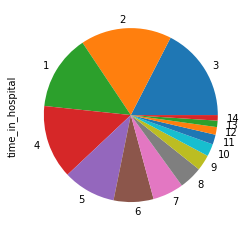

In [7]:
df['time_in_hospital'].value_counts().plot(kind = 'pie');# the time in hospital 

In [8]:
def HandlingMissingValues(df):
    df = df.drop('weight',axis=1)# as weight has mostly all null values
    df = df.drop('payer_code',axis=1)# dropped as many null values
    df = df.drop('medical_specialty',axis=1)# dropped as many null values
    df = df.drop(['citoglipton', 'examide'], axis = 1)# citoglipton and examide have almost similar values so i dropped them
    df = df.dropna(subset=['diag_1','diag_2','diag_3'])# dropping all null values from Diagnosis
    df = df.dropna(subset=['race'])# dropping all null values from race
    return df

In [9]:
df.columns# to  show all column names

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [10]:
def EncodingColumns(df):
    # the below columns have same values so we added them in a column and did the same code
    df['diag_1'] = df['diag_1'].astype('category').cat.codes
    df['diag_2'] = df['diag_2'].astype('category').cat.codes
    df['diag_3'] = df['diag_3'].astype('category').cat.codes
    cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide','glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
    for col in cols:
        df[col] = df[col].replace('No', 0)
        df[col] = df[col].replace('Steady', 1)
        df[col] = df[col].replace('Up', 1)
        df[col] = df[col].replace('Down', 1)
    # label encoding remaining categorical datatypes
    df = df[df.gender != 'Unknown/Invalid']
    df['change'] = df['change'].replace('Ch', 1)# change ch to 1
    df['change'] = df['change'].replace('No', 0)# change No to 0
    df['gender'] = df['gender'].replace('Male', 1)
    df['gender'] = df['gender'].replace('Female', 0)
    df=df.dropna(subset=['gender'])

    df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
    df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
    
    df['A1Cresult'] = df['A1Cresult'].replace('>7', 2)
    df['A1Cresult'] = df['A1Cresult'].replace('>8', 3)
    df['A1Cresult'] = df['A1Cresult'].replace('Norm', 1)
    df['A1Cresult'] = df['A1Cresult'].replace('None', 0)

    df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 2)
    df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 3)
    df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 1)
    df['max_glu_serum'] = df['max_glu_serum'].replace('None', 0)
    
    #giving each age range a nemurical value
    age_id = {'[0-10)':0, '[10-20)':10, '[20-30)':20, '[30-40)':30, '[40-50)':40, '[50-60)':50,'[60-70)':60, '[70-80)':70, '[80-90)':80, '[90-100)':90}
    df['age'] = df.age.replace(age_id)
    
    #encoding readmitted  I have given 0 to NO as well >30
    df['readmitted'] = df['readmitted'].replace('>30', 0)
    df['readmitted'] = df['readmitted'].replace('<30', 1)
    df['readmitted'] = df['readmitted'].replace('NO', 0)
    
    l_e = preprocessing.LabelEncoder()
    df['race'] = l_e.fit_transform(df['race'])# we have label encoded race as there are many values
    
    return df

In [11]:
def RemovingDuplicates(df):
    df = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')# removing all duplicate columns using patient number
    return df

In [12]:
def RemovingUnwantedColumns(df):
    df = df.drop('encounter_id',axis=1)# removed the encounterid as it is just an id
    df = df.drop('patient_nbr',axis=1)# removed the encounterid as it is just an id
    return df

In [13]:
df_test = pd.read_csv("D:\diabetic_data_test.csv", na_values = '?')# importing the test dataset and convert all ? to Nan
df_test = HandlingMissingValues(df_test)
df_test = EncodingColumns(df_test)
#df_test = RemovingDuplicates(df_test)
df_test = RemovingUnwantedColumns(df_test)

In [14]:
df_test = df_test.drop('Unnamed: 0', axis=1)

In [15]:
df_test.isnull().sum()# now we see that there are no null values

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [16]:
df_test.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,80,1,3,7,11,82,4,28,...,0,0,0,0,0,0,0,1,1,0
1,2,0,30,1,1,7,5,44,0,16,...,0,1,0,0,0,0,0,1,1,0
2,0,1,70,2,1,1,1,39,0,7,...,0,1,0,0,0,0,0,0,1,0
3,2,1,70,3,6,1,3,1,2,22,...,0,0,0,0,0,0,0,0,0,0
4,0,0,70,3,18,1,6,35,3,29,...,0,0,0,0,0,0,0,1,1,0


In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24535 entries, 0 to 25441
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   race                      24535 non-null  int32
 1   gender                    24535 non-null  int64
 2   age                       24535 non-null  int64
 3   admission_type_id         24535 non-null  int64
 4   discharge_disposition_id  24535 non-null  int64
 5   admission_source_id       24535 non-null  int64
 6   time_in_hospital          24535 non-null  int64
 7   num_lab_procedures        24535 non-null  int64
 8   num_procedures            24535 non-null  int64
 9   num_medications           24535 non-null  int64
 10  number_outpatient         24535 non-null  int64
 11  number_emergency          24535 non-null  int64
 12  number_inpatient          24535 non-null  int64
 13  diag_1                    24535 non-null  int16
 14  diag_2                    24535 non-nu

In [18]:
df_train = pd.read_csv("D:\diabetic_data_train.csv", na_values = '?')# importing the test dataset and convert all ? to Nan
df_train = HandlingMissingValues(df_train)
df_train = EncodingColumns(df_train)
#df_train = RemovingDuplicates(df_train)
df_train = RemovingUnwantedColumns(df_train)

In [19]:
df_train = df_train.drop('Unnamed: 0', axis=1)

In [20]:
df_train.isnull().sum()# now we see that there are no null values

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73517 entries, 1 to 76323
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   race                      73517 non-null  int32
 1   gender                    73517 non-null  int64
 2   age                       73517 non-null  int64
 3   admission_type_id         73517 non-null  int64
 4   discharge_disposition_id  73517 non-null  int64
 5   admission_source_id       73517 non-null  int64
 6   time_in_hospital          73517 non-null  int64
 7   num_lab_procedures        73517 non-null  int64
 8   num_procedures            73517 non-null  int64
 9   num_medications           73517 non-null  int64
 10  number_outpatient         73517 non-null  int64
 11  number_emergency          73517 non-null  int64
 12  number_inpatient          73517 non-null  int64
 13  diag_1                    73517 non-null  int16
 14  diag_2                    73517 non-nu

In [22]:
x_train= df_train.drop('readmitted',axis=1).copy()
x_test= df_test.drop('readmitted',axis=1).copy()
y_train=df_train['readmitted'].copy()
y_test=df_test['readmitted'].copy()

In [23]:
x_test.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,2,0,80,1,3,7,11,82,4,28,...,0,0,0,0,0,0,0,0,1,1
1,2,0,30,1,1,7,5,44,0,16,...,0,0,1,0,0,0,0,0,1,1
2,0,1,70,2,1,1,1,39,0,7,...,0,0,1,0,0,0,0,0,0,1
3,2,1,70,3,6,1,3,1,2,22,...,0,0,0,0,0,0,0,0,0,0
4,0,0,70,3,18,1,6,35,3,29,...,0,0,0,0,0,0,0,0,1,1


# Decision Tree Classifier

In [24]:
model = DecisionTreeClassifier(criterion = "gini", max_depth = 8, min_samples_leaf = 8)
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [25]:
print('accuracy is ' +str(accuracy_score(y_test, pred)))

accuracy is 0.8862848991237008


# RandomForestClassifier

In [27]:
# used a RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [28]:
print('accuracy is ' +str(accuracy_score(y_test, pred)))

accuracy is 0.8877114326472386


# Ada Boost

In [30]:
# used a Ada Boost Classifier
model = ada()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [31]:
print('accuracy is ' +str(accuracy_score(y_test, pred)))

accuracy is 0.887263093539841
